<a href="https://colab.research.google.com/github/Sahilo6/redHanded-ai-ml/blob/main/reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install gymnasium pygame numpy matplotlib -q

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

print("Environment ready for Reinforcement Learning!")

Environment ready for Reinforcement Learning!


In [5]:
env = gym.make('FrozenLake-v1', is_slippery=True, render_mode='ansi')

print(f"Environment: {env.spec.id}")
print(f"State space: {env.observation_space.n} positions")
print(f"Action space: {env.action_space.n} actions (Left, Down, Right, Up)")
print("\nEnvironment Map:")

# Reset the environment before rendering
initial_state, _ = env.reset()
print(env.render())

Environment: FrozenLake-v1
State space: 16 positions
Action space: 4 actions (Left, Down, Right, Up)

Environment Map:

SFFF
FHFH
FFFH
HFFG



In [6]:
state_size = env.observation_space.n
action_size = env.action_space.n

Q_table = np.zeros((state_size, action_size))

print(f"Q-Table initialized with shape: {Q_table.shape}")
print("Initial Q-values (all zeros):")
print(Q_table)

Q-Table initialized with shape: (16, 4)
Initial Q-values (all zeros):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
learning_rate = 0.8
discount_factor = 0.95
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

num_episodes = 10000
max_steps = 100

print("Hyperparameters:")
print(f"Learning Rate (α): {learning_rate}")
print(f"Discount Factor (γ): {discount_factor}")
print(f"Initial Exploration (ε): {epsilon}")
print(f"Training Episodes: {num_episodes}")

Hyperparameters:
Learning Rate (α): 0.8
Discount Factor (γ): 0.95
Initial Exploration (ε): 1.0
Training Episodes: 10000


In [8]:
rewards_per_episode = []
epsilon_values = []

for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[state, :])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        Q_table[state, action] = Q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(Q_table[next_state, :]) - Q_table[state, action]
        )

        state = next_state
        total_reward += reward

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards_per_episode.append(total_reward)
    epsilon_values.append(epsilon)

    if (episode + 1) % 1000 == 0:
        avg_reward = np.mean(rewards_per_episode[-1000:])
        print(f"Episode {episode + 1}/{num_episodes} | Avg Reward: {avg_reward:.3f} | Epsilon: {epsilon:.3f}")

print("\nTraining Complete!")

Episode 1000/10000 | Avg Reward: 0.199 | Epsilon: 0.010
Episode 2000/10000 | Avg Reward: 0.543 | Epsilon: 0.010
Episode 3000/10000 | Avg Reward: 0.439 | Epsilon: 0.010
Episode 4000/10000 | Avg Reward: 0.514 | Epsilon: 0.010
Episode 5000/10000 | Avg Reward: 0.549 | Epsilon: 0.010
Episode 6000/10000 | Avg Reward: 0.506 | Epsilon: 0.010
Episode 7000/10000 | Avg Reward: 0.505 | Epsilon: 0.010
Episode 8000/10000 | Avg Reward: 0.464 | Epsilon: 0.010
Episode 9000/10000 | Avg Reward: 0.529 | Epsilon: 0.010
Episode 10000/10000 | Avg Reward: 0.504 | Epsilon: 0.010

Training Complete!


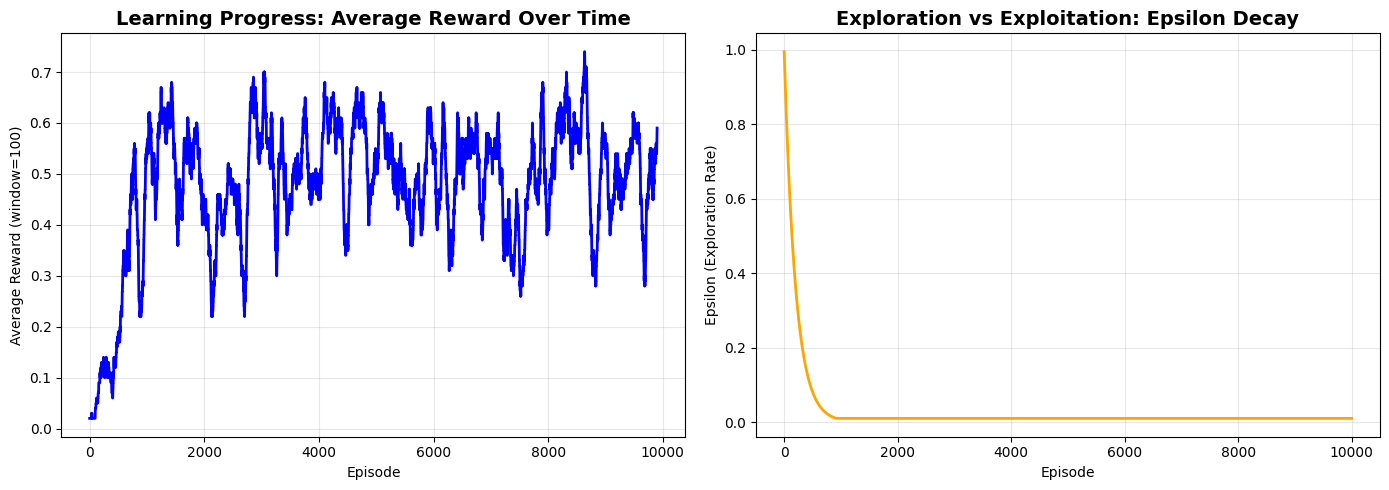

In [9]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
window = 100
moving_avg = np.convolve(rewards_per_episode, np.ones(window)/window, mode='valid')
plt.plot(moving_avg, linewidth=2, color='blue')
plt.title('Learning Progress: Average Reward Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Episode')
plt.ylabel(f'Average Reward (window={window})')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(epsilon_values, linewidth=2, color='orange')
plt.title('Exploration vs Exploitation: Epsilon Decay', fontsize=14, fontweight='bold')
plt.xlabel('Episode')
plt.ylabel('Epsilon (Exploration Rate)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
print("Learned Q-Table (State-Action Values):")
print(Q_table)
print("\nOptimal Policy (Best Action per State):")

action_symbols = ['←', '↓', '→', '↑']
policy = np.argmax(Q_table, axis=1)

for i in range(0, 16, 4):
    row = [action_symbols[policy[j]] for j in range(i, i+4)]
    print(' '.join(row))

Learned Q-Table (State-Action Values):
[[2.00209171e-01 2.24340554e-02 1.13211997e-01 1.28236466e-01]
 [8.09583808e-03 7.33033037e-03 1.79320483e-06 2.54056009e-01]
 [3.58240498e-03 8.90786428e-03 5.04470633e-03 1.61951930e-01]
 [1.29802243e-06 3.15943289e-04 3.63079399e-03 1.66331686e-02]
 [2.71965863e-01 7.81621373e-02 8.23224275e-02 1.16492612e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.22708791e-05 1.23701459e-11 8.03122506e-02 4.29053890e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.14410098e-01 7.48258236e-02 2.18734395e-02 5.76455677e-01]
 [7.46507810e-02 4.17103067e-01 5.03896003e-03 4.31019174e-05]
 [8.24353710e-01 1.12536840e-03 5.73301927e-03 1.77319893e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.19127901e-01 8.10271694e-02 7.80255024e-01 6.12617112e-02]
 [7.23638909e-02 9.62790116e-01 1.25400667e-01 2.62046526e-01]
 [0.00000000e+00

In [11]:
num_test_episodes = 100
test_rewards = []

for episode in range(num_test_episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        action = np.argmax(Q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        state = next_state
        total_reward += reward

        if done:
            break

    test_rewards.append(total_reward)

success_rate = np.sum(test_rewards) / num_test_episodes * 100
print(f"Test Results over {num_test_episodes} episodes:")
print(f"Success Rate: {success_rate:.1f}%")
print(f"Average Reward: {np.mean(test_rewards):.3f}")

Test Results over 100 episodes:
Success Rate: 80.0%
Average Reward: 0.800


In [12]:
env_visual = gym.make('FrozenLake-v1', is_slippery=True, render_mode='ansi')
state, _ = env_visual.reset()

print("Watching trained agent navigate (one episode):\n")

for step in range(max_steps):
    clear_output(wait=True)
    print(env_visual.render())
    print(f"\nStep: {step + 1}")
    print(f"Current State: {state}")

    action = np.argmax(Q_table[state, :])
    action_name = ['Left', 'Down', 'Right', 'Up'][action]
    print(f"Action: {action_name}")

    next_state, reward, terminated, truncated, _ = env_visual.step(action)
    done = terminated or truncated

    state = next_state
    time.sleep(0.5)

    if done:
        clear_output(wait=True)
        print(env_visual.render())
        if reward == 1:
            print("\n🎉 SUCCESS! Agent reached the goal!")
        else:
            print("\n❌ Failed - fell into a hole")
        break

env_visual.close()

  (Down)
SFFF
FHFH
FFFH
HFFG


🎉 SUCCESS! Agent reached the goal!
